In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("./data/census_epa_theil_cleaned.csv")
df.columns

Index(['ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME', 'REGION',
       'AREALAND', 'pop_tot', 'pop_white_only', 'pop_black', 'pop_asian',
       'pop_hispanic_latino_any', 'industry_tot', 'industry_ag_for',
       'industry_const', 'industry_manu', 'industry_transp', 'pop_density',
       'poverty_pct', 'income_median', 'health_ins_tot', 'health_ins_yes',
       'health_ins_no', 'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT',
       'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only',
       'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
       'prim_ind_share', 'sec_ind_share', 'health_ins_pct',
       'theil_income_median'],
      dtype='object')

In [4]:
df = df[['pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any',
        'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct',
        'PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS']]

In [5]:
# scatter plots of each variable vs pm25 level with cut off line at PM25=9
for col in df.columns:
    if col != 'PM25':
        plt.figure(figsize=(10, 7))
        sns.scatterplot(data=df, x=col, y='PM25', hue='PM25', palette="YlOrBr")
        # Add a horizontal line at Pm25=9
        plt.axhline(y=9, color='blue', label='PM25=9')
        plt.title("{0} vs PM25".format(col))
        plt.savefig("./images/scatter_plots/"+col)
        plt.close()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

In [5]:
df['PM25_risk'] = df['PM25'].apply(lambda x: 1 if x>9 else 0)

In [10]:
#  Histogram for each variable
for col in df.columns:
    if col != 'PM25' or col != 'PM25_risk':
        plt.figure(figsize=(10, 7))
        sns.histplot(data=df, x=col, hue='PM25_risk', stat='percent')
        plt.savefig("./images/histograms/"+col)
        plt.close()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

In [6]:
# urban cutoff
urban_df = df[df['pop_density'] > 500]

In [7]:
urban_df

pct_pop_white_only  pct_pop_black  pct_pop_asian  \
1               39.054726      58.457711       2.736318   
2               68.017892      30.891809       3.634330   
3               89.689637       7.048922       0.920568   
4               75.850262      22.939968       0.639123   
5               80.318510       4.987981      12.980769   
...                   ...            ...            ...   
80115           95.336127       1.257060       0.783385   
80122           82.550535       0.000000       2.437574   
80125           83.975318       4.805535       3.309648   
80138           78.557754       0.000000       4.530951   
80147           79.891304       2.128623       0.000000   

       pct_pop_hispanic_latino_any  pop_density  prim_ind_share  \
1                         0.497512   605.272556        0.000000   
2                         0.363433   668.689248        0.000000   
3                         0.736454   595.525072        0.079051   
4                         2.168455   706.196703        0.000000   
5                        15.084135  1586.733988        0.000000   
...                            ...          ...             ...   
80115                     4.445254   886.002230        1.920236   
80122                    10.255648  2246.007228        8.769322   
80125                    11.406133   735.764511        5.379388   
80138                    24.282068   501.253614        0.031949   
80147                    24.365942  1107.766406        0.000000   

       sec_ind_share  poverty_pct  theil_income_median  health_ins_pct  ...  \
1           6.746712          6.6         4.435235e-06       93.024585  ...   
2           7.450098         17.2         1.944627e-06       96.232780  ...   
3          11.646904          8.1         7.687476e-07       95.177866  ...   
4           3.865074         18.0         2.502762e-06       96.439447  ...   
5           7.016960          3.6         1.707180e-06      100.000000  ...   
...              ...          ...                  ...             ...  ...   
80115       4.726736         14.5         7.225792e-06       83.641064  ...   
80122       8.382878          4.1        -3.942781e-06       93.222354  ...   
80125       4.039260          6.5        -1.331279e-06       92.600982  ...   
80138       8.434505          7.2        -3.457717e-06       81.853035  ...   
80147      11.840294          3.4         2.090602e-06       88.985773  ...   

          OZONE     DSLPM       PTRAF  PRE1960PCT      PNPL      PRMP  \
1      60.02012  0.176942   65.510247    0.294511  0.072671  0.082691   
2      59.90393  0.204497   46.665740    0.087077  0.075500  0.082142   
3      59.95221  0.242509  144.572390    0.081486  0.084302  0.087589   
4      59.92819  0.261567   73.784886    0.005914  0.106715  0.103047   
5      59.92819  0.261567   83.147044    0.027938  0.092181  0.085835   
...         ...       ...         ...         ...       ...       ...   
80115  55.51153  0.157786   60.105696    0.240497  0.006236  0.062641   
80122  62.35421  0.188594    2.839285    0.031159  0.005253  0.271005   
80125  62.38181  0.323254  163.093434    0.010304  0.004758  0.082184   
80138  58.83814  0.045113   47.513128    0.139654  0.009128  0.010972   
80147  55.61779  0.057243   57.325113    0.787879  0.004983  0.119736   

          PTSDF        UST     PWDIS  PM25_risk  
1      0.067863   2.208384  0.097622          1  
2      0.071178   1.830997  0.001432          1  
3      0.079793   2.958719  0.000062          1  
4      0.100418   3.004055  0.017290          1  
5      0.089865   1.111991  0.015404          1  
...         ...        ...       ...        ...  
80115  0.008189   4.651376  0.002214          0  
80122  0.021479   0.820310  0.000033          0  
80125  0.025599   5.083033  0.000052          0  
80138  0.009677   2.541114  0.000005          0  
80147  0.013346  16.389308  0.359507          0  

[48660 rows x 21 columns]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


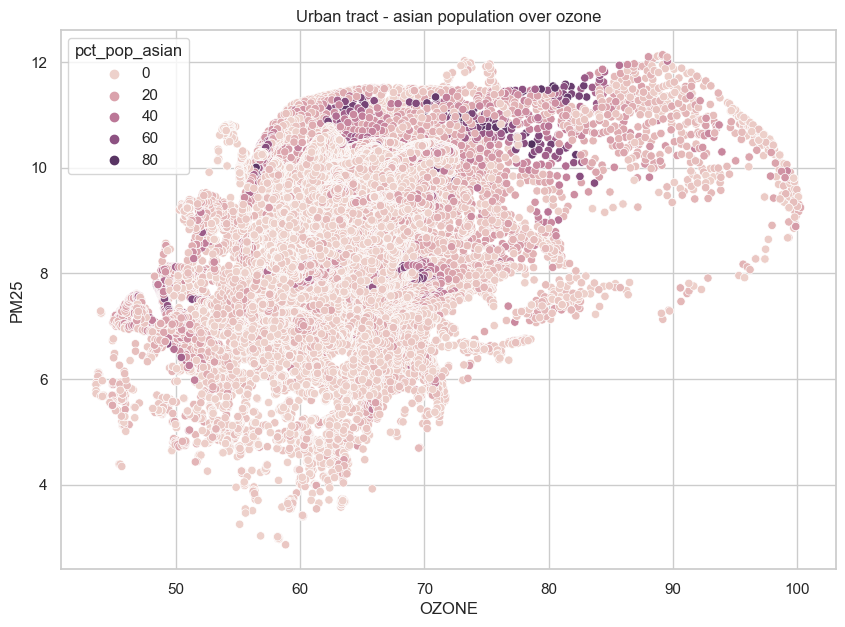

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='OZONE', y='PM25', hue='pct_pop_asian')
plt.title("Urban tract - asian population over ozone")
plt.savefig("./images/urban_plots/asian_ozone")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


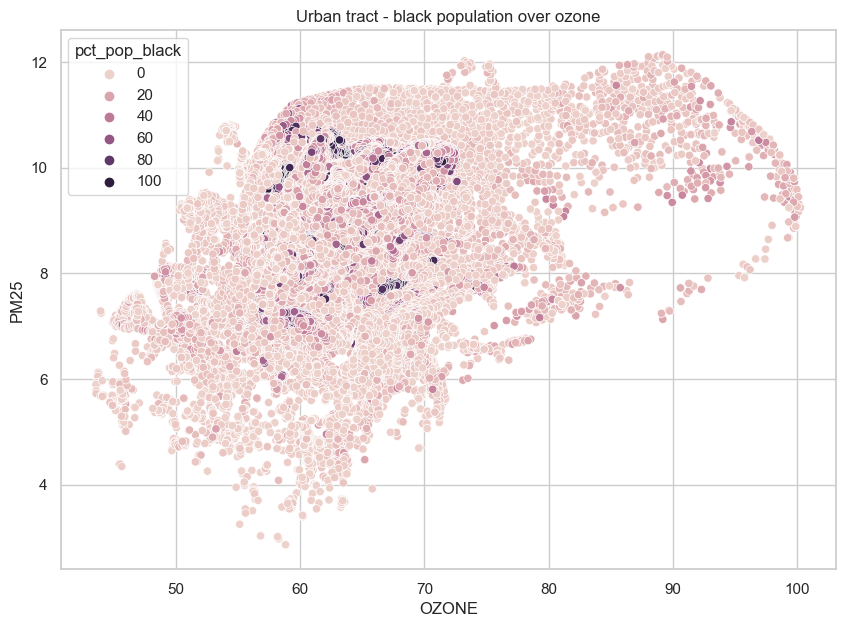

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='OZONE', y='PM25', hue='pct_pop_black')
plt.title("Urban tract - black population over ozone")
plt.savefig("./images/urban_plots/black_ozone")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


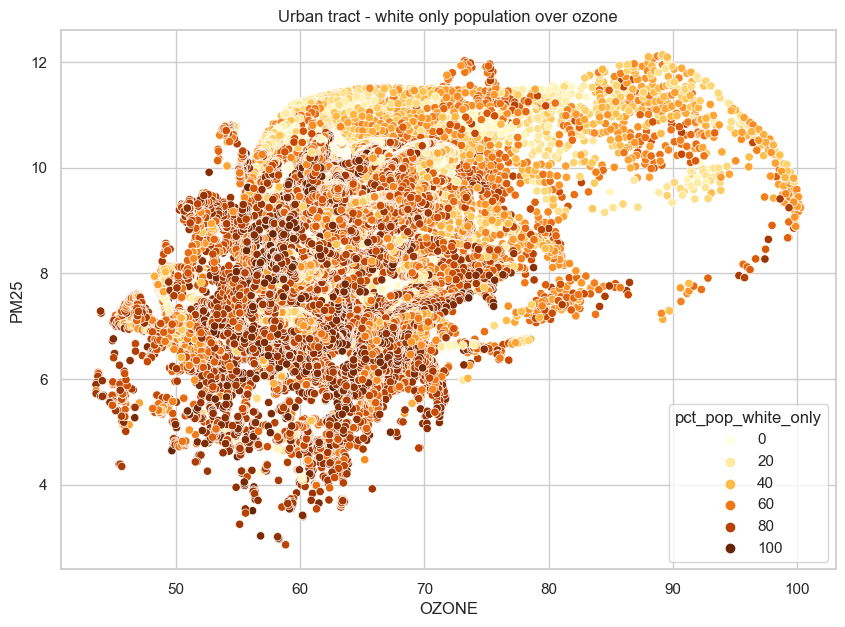

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='OZONE', y='PM25', hue='pct_pop_white_only', palette="YlOrBr")
plt.title("Urban tract - white only population over ozone")
plt.savefig("./images/urban_plots/white_only_ozone")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


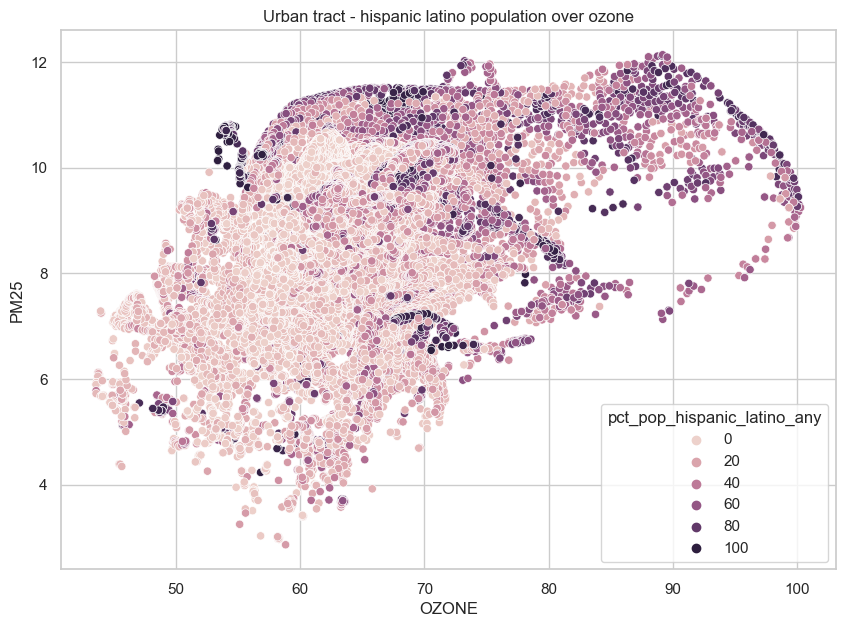

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='OZONE', y='PM25', hue='pct_pop_hispanic_latino_any')
plt.title("Urban tract - hispanic latino population over ozone")
plt.savefig("./images/urban_plots/hispanic_latino_ozone")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


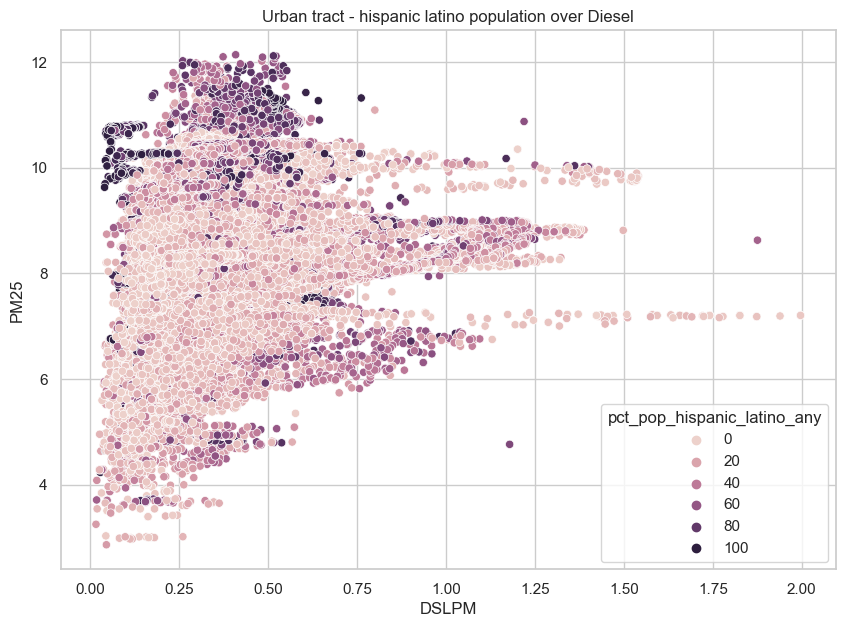

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='DSLPM', y='PM25', hue='pct_pop_hispanic_latino_any')
plt.title("Urban tract - hispanic latino population over Diesel")
plt.savefig("./images/urban_plots/hispanic_latino_diesel")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

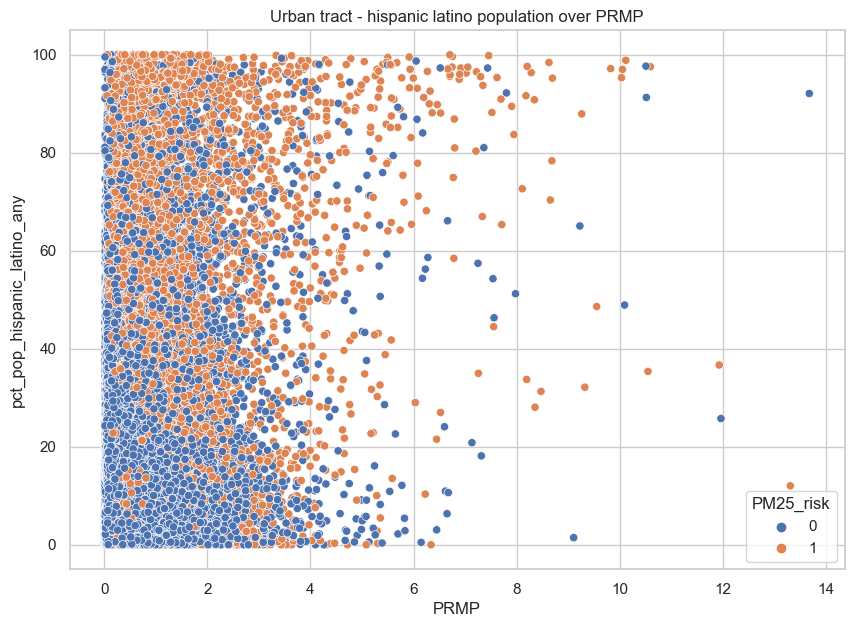

In [35]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='PRMP', y='pct_pop_hispanic_latino_any', hue='PM25_risk')
plt.title("Urban tract - hispanic latino population over PRMP")
plt.savefig("./images/urban_plots/hispanic_latino_PRMP")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

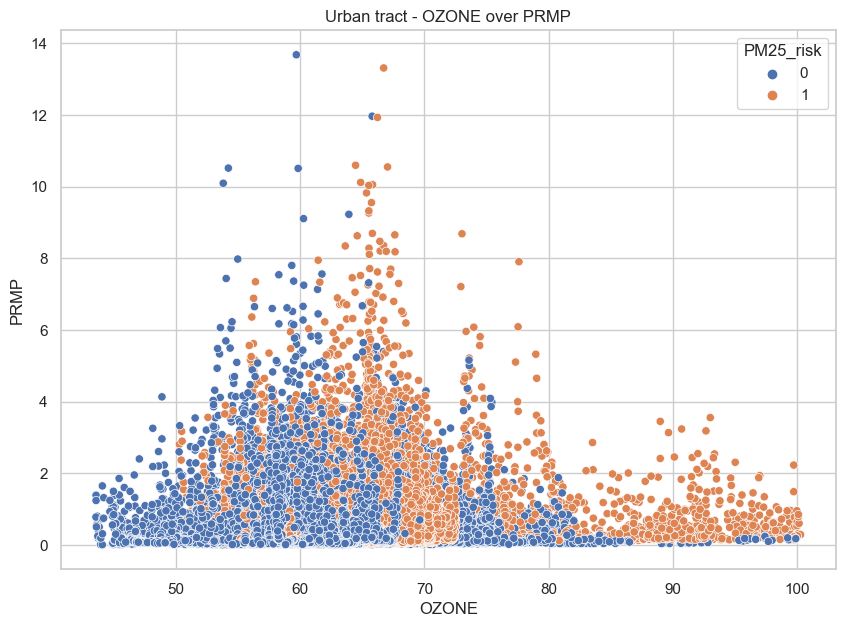

In [38]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=urban_df, x='OZONE', y='PRMP', hue='PM25_risk')
plt.title("Urban tract - OZONE over PRMP")
plt.savefig("./images/urban_plots/OZONE_PRMP")

In [34]:
urban_df['PM25_risk']

1        1
2        1
3        1
4        1
5        1
        ..
80115    0
80122    0
80125    0
80138    0
80147    0
Name: PM25_risk, Length: 48660, dtype: int64

In [8]:
urban_env_df = urban_df[["PRMP", "PNPL", "PTRAF"]]
urban_demo_df = urban_df[["pct_pop_white_only", "pct_pop_black", "pct_pop_asian", "pct_pop_hispanic_latino_any"]]
urban_new_df = urban_df[["PRMP", "PNPL", "PTRAF", "PM25_risk", "pct_pop_white_only", "pct_pop_black", "pct_pop_asian", "pct_pop_hispanic_latino_any"]]
i = 0

# fig, axes = plt.subplots(12, figsize=(300,500))

for env in urban_env_df.columns:
    for demo in urban_demo_df.columns:
        plt.figure(figsize=(10,7))
        sns.scatterplot(data=urban_new_df, x=env, y=demo, hue='PM25_risk')
        plt.title("Urban tract - "+str(env)+" over "+str(demo))
        plt.savefig("./images/urban_plots/env_vs_demo/"+str(env)+"_"+str(demo))
        plt.close()
        i = i+1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

/var/folders/8c/g0kklql11cx6g3bc4ybf0q_m0000gn/T/ipykernel_66378/2545865828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_env_df.rename(columns = {'PRMP':'RMP Proximity', 'PNPL': 'Superfund Proximity', 'PTRAF':'Traffic Proximity'}, inplace = True)
/var/folders/8c/g0kklql11cx6g3bc4ybf0q_m0000gn/T/ipykernel_66378/2545865828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_demo_df.rename(columns= {"pct_pop_white_only": "White Population (%)", "pct_pop_black": "Black Population (%)",
/var/folders/8c/g0kklql11cx6g3bc4ybf0q_m0000gn/T/ipykernel_66378/2545865828.py:9: SettingWithCopyWarning: 
A value is tr

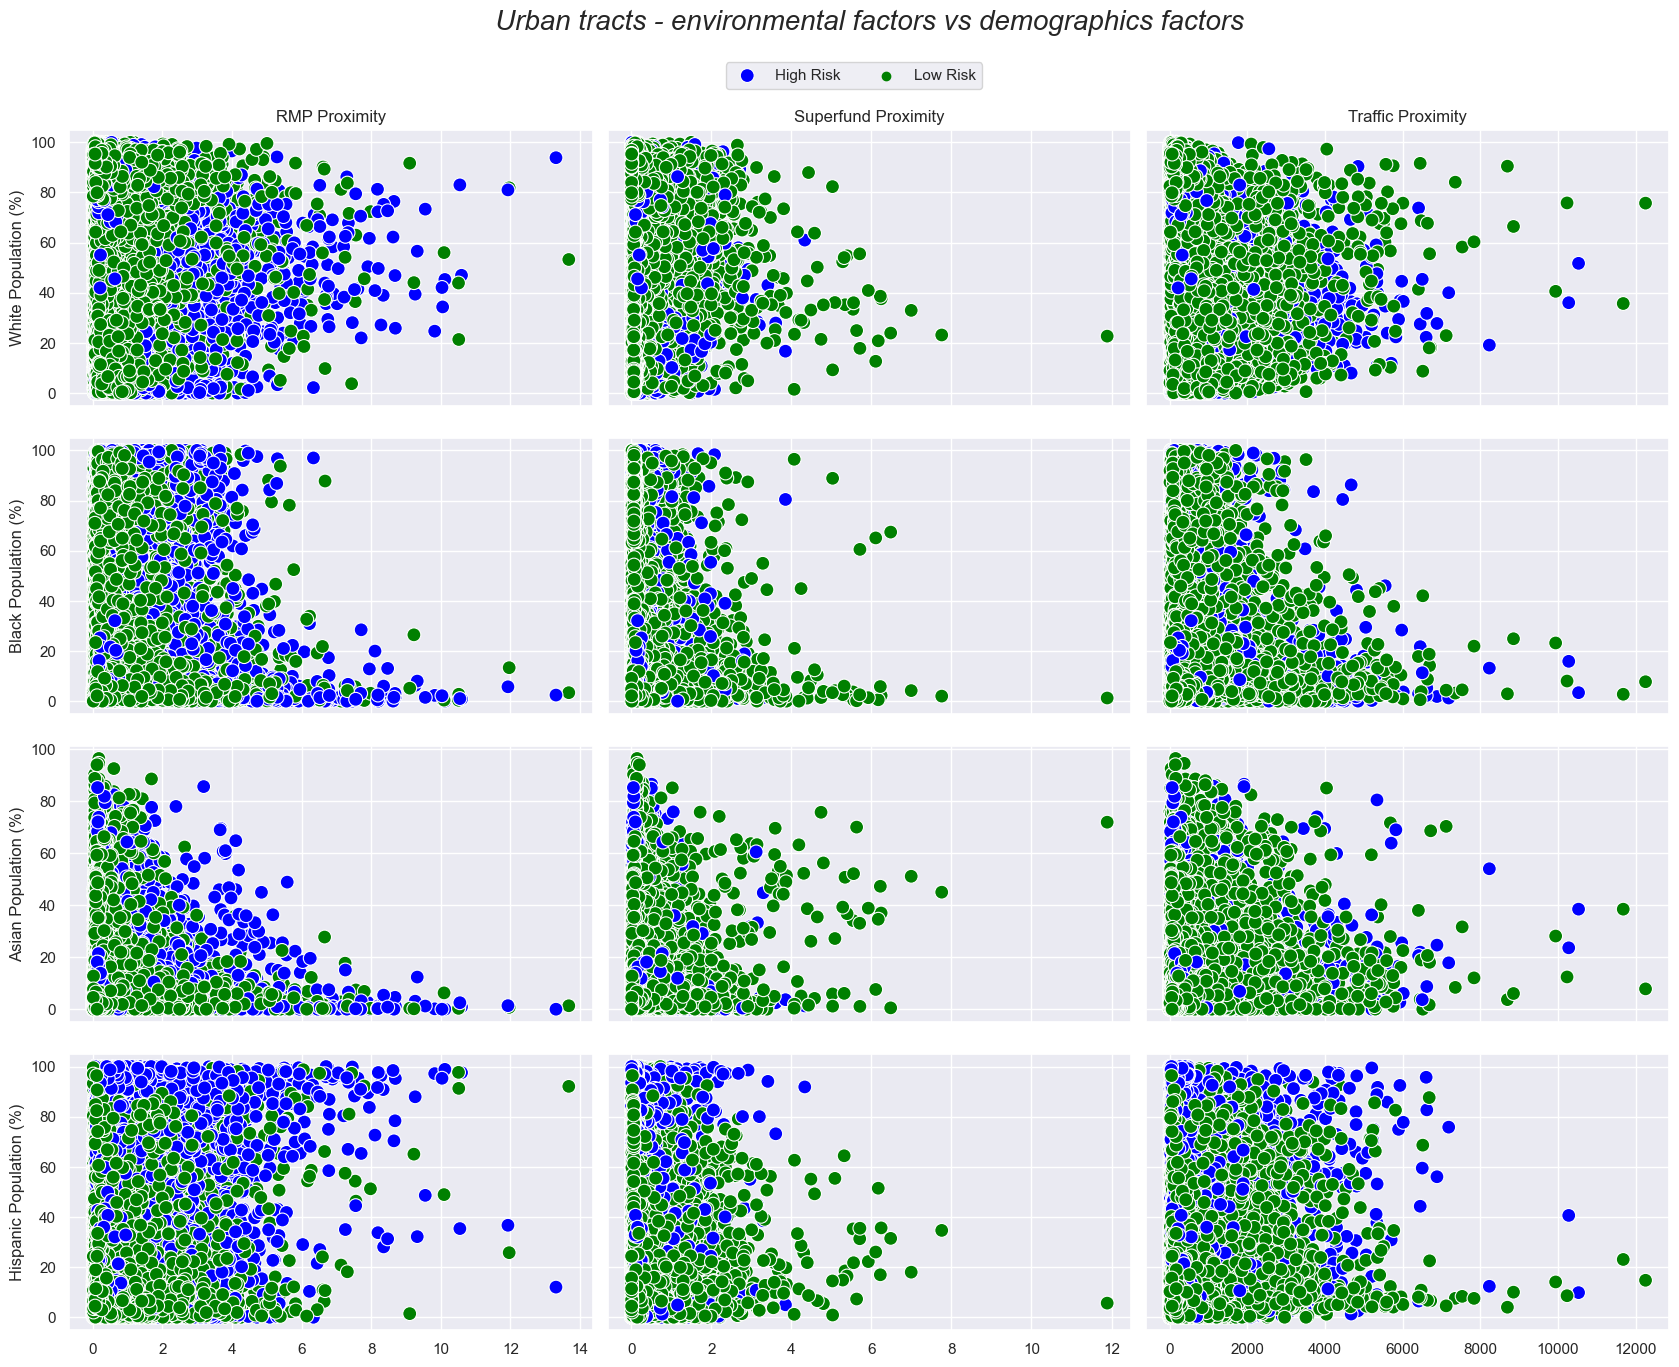

In [10]:
sns.set(style="darkgrid")

urban_env_df = urban_df[["PRMP", "PNPL", "PTRAF"]]
urban_env_df.rename(columns = {'PRMP':'RMP Proximity', 'PNPL': 'Superfund Proximity', 'PTRAF':'Traffic Proximity'}, inplace = True)
urban_demo_df = urban_df[["pct_pop_white_only", "pct_pop_black", "pct_pop_asian", "pct_pop_hispanic_latino_any"]]
urban_demo_df.rename(columns= {"pct_pop_white_only": "White Population (%)", "pct_pop_black": "Black Population (%)",
                               "pct_pop_asian": "Asian Population (%)", "pct_pop_hispanic_latino_any": "Hispanic Population (%)"}, inplace=True)
urban_new_df = urban_df[["PRMP", "PNPL", "PTRAF", "PM25_risk", "pct_pop_white_only", "pct_pop_black", "pct_pop_asian", "pct_pop_hispanic_latino_any"]]
urban_new_df.rename(columns={'PRMP':'RMP Proximity', 'PNPL': 'Superfund Proximity', 'PTRAF':'Traffic Proximity',
                             "pct_pop_white_only": "White Population (%)", "pct_pop_black": "Black Population (%)",
                             "pct_pop_asian": "Asian Population (%)", "pct_pop_hispanic_latino_any": "Hispanic Population (%)"}, inplace=True)

i= 0
j=0

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20))

for demo in urban_demo_df.columns:
    for env in urban_env_df.columns: 
        ax = sns.scatterplot(data=urban_new_df, x=env, y=demo, hue='PM25_risk', ax=axs[i][j], s=100, palette=["green", "blue"])
        ax.set(xlabel=None, ylabel=None)
        if i!=3:
            ax.set(xticklabels=[])
        if j!=0:
            ax.set(yticklabels=[])

        if i == 0:
            axs[i][j].set_title(env)
        if j == 0:
            axs[i][j].set(ylabel=demo)

    
        j = j+1
    i = i+1
    j=0

common_handles, common_labels = axs[0][0].get_legend_handles_labels()
fig.legend(common_handles, labels=['High Risk', 'Low Risk'], loc='upper right', bbox_to_anchor=(0.56, 0.95), ncol=2)

axs=axs.flatten()
for ax in axs:
    ax.get_legend().remove()

fig.tight_layout(h_pad=3)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.suptitle("Urban tracts - environmental factors vs demographics factors", style="italic", fontsize=20)
fig.set_figheight(15)
fig.savefig("./images/urban_plots/env_vs_demo/combined_plots")
